### Event-based timeseries

This notebooks illustrates the use of ModelSkill for assessing the skill of a model over event-based timeseries. This type of data is characterized by limited periods of activity, separated by intervals of no or irrelavant activity.

The example shown below is obtained from a combined urban drainage system, where wet events (observation or model > 0) alternate with dry periods (observation and model = 0). In this case, ModelSkill can be used to compute metrics on the entire observation period, only the periods of activity, or separately on each event.

In [2]:
import pandas as pd
import modelskill as ms

In [3]:
# Import timeseries data
path = '../tests/testdata/event-based_timeseries.csv'
df = pd.read_csv(path, sep=',', header=0, index_col=0, parse_dates=True)

In [5]:
df.describe()

,model,obs,event
count,4623.000000,4623.000000,4623.000000
mean,0.009067,0.007625,1.176725
std,0.054241,0.050980,5.125146
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.760000,0.761500,29.000000


The dataset has been preprocessed to define an auxiliary indicator (event). The indicator is set to 0 for dry periods or given an interger value for all recorded/modelled events. The event indicators are assign sequentially in chronological order.

In [6]:
cmp = ms.from_matched(df, obs_item='obs', mod_items=['model'], aux_items=['event'], quantity=ms.Quantity(name='Discharge', unit='m3/s'))
cmp.data

<xarray.Dataset>
Dimensions:      (time: 4623)
Coordinates:
  * time         (time) datetime64[ns] 2022-08-18T06:00:00 ... 2023-08-18
Data variables:
    Observation  (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    model        (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    event        (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    x            float64 nan
    y            float64 nan
Attributes:
    name:           obs
    gtype:          point
    quantity_name:  Discharge

In [7]:
cmp.plot.timeseries(backend="plotly")

**1. Global skill over observation period**

This is clearly affected by the long dry periods, where both model and observation show no activity (which corresponds to RMSE = 0).

In [8]:
cmp.skill(metrics='rmse').round(2).style()

,n,rmse
observation,,
obs,4623,0.050


**2. Global skill over all events**

By limiting the skill to periods of activity we can better assess how well the model fits the observed data.

In [9]:
cmp.where(cmp.data.event > 0).skill(metrics='rmse').round(2).style()

,n,rmse
observation,,
obs,283,0.220


<Axes: title={'center': 'Linear regression'}, xlabel='Observation, Discharge [m3/s]', ylabel='Model, Discharge [m3/s]'>

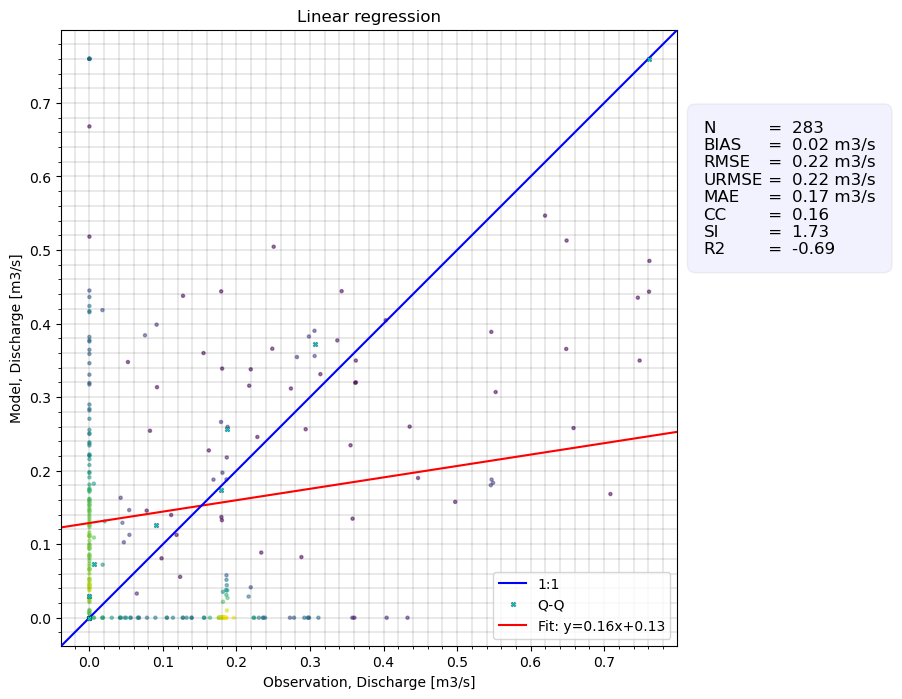

In [10]:
cmp.where(cmp.data.event > 0).plot.scatter(skill_table=True, title='Linear regression');

**3. Event-based skill assessment**

The skill metric can be computed separately for each event by grouping the datapoints according to the auxiliary value. This can help identify specific events where the model is in disagreement with the observations.

In [10]:
ss = cmp.skill(by="event", metrics='rmse')
ss.style()

,observation,n,rmse
event,,,
0.000000,obs,4340,0.000
1.000000,obs,11,0.076
2.000000,obs,9,0.638
3.000000,obs,7,0.297
4.000000,obs,3,0.028
5.000000,obs,5,0.175
6.000000,obs,4,0.114
7.000000,obs,5,0.162
8.000000,obs,5,0.161
